# AltiQo Telecom data analysis

In [1]:
#installing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

## About the data set: 
AtliQo is one of the leading telecom providers in India and launched it’s 5G plans in May 2022 along with other telecom providers.
However, the management noticed a decline in their active users and revenue growth post 5G launch in May 2022. Atliqo’s business director requested their analytics team to provide a comparison report of KPIs between pre and post-periods of the 5G launch. The management is keen to compare the performance between these periods and get insights which would enable them to make informed decisions to recover their active user rate and other key metrics. They also wonder if they can optimize their internet plans to get more active users

Datasource : codebasic.io

# Loading data

In [2]:
#Loading data sets 
cities = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\C3 Input_for_Participants\dim_cities.csv")
date = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\C3 Input_for_Participants\dim_date.csv")
plan = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\C3 Input_for_Participants\dim_plan.csv")
metrics = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\C3 Input_for_Participants\fact_atliqo_metrics.csv")
market_share = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\C3 Input_for_Participants\fact_market_share.csv")
plan_revenue = pd.read_csv(r"C:\Users\crama\OneDrive\Desktop\Junior Data Analyst course\Portfolio project\C3 Input_for_Participants\fact_plan_revenue.csv")



## Dataframes :

Column Description for cities:
1. city_code: This column represents the unique code given for each city.
2. city_name: This column represents the name of the city corresponding to the city code.

Column Description for date:
1. date: This column represents the starting date of each month. 
2. month_name: This column represents the month names in abbreviated form(Example: Jan, Feb, Mar, etc). We have months starting from January to September except for May.
3. before/after_5g: This column represents the unique category based on the month. We have 2 categories, Before 5G and After 5G. January to April comes represents the period before 5G implementation and June to September represents periods after 5G implementation.
4. time_period: This column represents the unique sequence number ranging from 1 to 4. These time Periods are used to make respective months comparisons before and after 5G implementation (Example: Jan vs Jun, Feb vs Jul, Mar vs Aug and Apr vs Sep)

Column Description for plan:
1. plan: This column represents the various internet plans provided by the Atliqo company to the users. 
2. plan_description: This column represents the brief description about the internet plan.

Column Description for metrics:
1. date: This column represents the starting date of each month.
2. city_code: This column represents the unique pincode code given for each city.
3. company: This column represents the company name for which the data is provided. In this dataset it's only Atliqo. 
4. atliqo_revenue_crores: This column represents the revenue that Atliqo got on that particular month in that city_code in crores(unit of currency in India - 1Crore = 10 Million) from the internet users. 
5. arpu: This column represents the average revenue per user. That means on average how much revenue Atliqo generated on single user for a given time period.
6. active_users_lakhs: This column represents the number of active users who are using Atliqo's service on that particular month in that city_code in lakhs(unit of currency in India - 1 Lakh = 100,000).
7. unsubscribed_users_lakhs: This column represents the number of unsubscribed users who unsubscribed from Atliqo on that particular month in that city_code in lakhs(unit of currency in India - 1 Lakh = 100,000). 

Column Description for market_share:
1. date: This column represents the starting date of each month.
2. city_code: This column represents the unique code given for each city.
3. tmv_city_crores: This column represents the total market value of the city in that month in crores(unit of currency in India) from the internet users. 
4. company: This column represents the different competitor names in the telecom industry [Atliqo, Britel, DADAFONE, PIO, Others].
5. ms_pct: This column represents the percentage of market share gained by respective company from the total market value(tmv_city) on that particular month in that city-code. 

Column Description for plan_revenue:
1. date: This column represents the starting date of each month.
2. city_code: This column represents the unique code given for each city.
3. plans: This column represents the various internet plans provided by the Atliqo company to the users.
4. plan_revenue_crores: This column represents the revenue that Atliqo got from that respective plan on that particular month in that city_code in crores (unit of currency in India - 1Crore = 10 Million).


In [3]:
#Checking the dataframes
display(cities,date,plan,metrics,market_share,plan_revenue)

,city_code,city_name
0,400001,Mumbai
1,110001,Delhi
2,700001,Kolkata
3,560001,Bangalore
4,600001,Chennai
5,500001,Hyderabad
6,411001,Pune
7,380001,Ahmedabad
8,302001,Jaipur
9,226001,Lucknow


,date,month_name,before/after_5g,time_period
0,01-Jan-22,Jan,Before 5G,1
1,01-Feb-22,Feb,Before 5G,2
2,01-Mar-22,Mar,Before 5G,3
3,01-Apr-22,Apr,Before 5G,4
4,01-Jun-22,Jun,After 5G,1
5,01-Jul-22,Jul,After 5G,2
6,01-Aug-22,Aug,After 5G,3
7,01-Sep-22,Sep,After 5G,4


,plan,plan_description
0,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,p2,Super Saviour Pack (1.5 GB / Day Combo For 56 ...
2,p3,Elite saver Pack (1 GB/ Day) Valid: 28 Days
3,p4,Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days
4,p5,Rs. 99 Full Talktime Combo Pack
5,p6,Xstream Mobile Data Pack: 15GB Data | 28 days
6,p7,25 GB Combo 3G / 4G Data Pack
7,p8,Daily Saviour (1 GB / Day) validity: 1 Day
8,p9,Combo TopUp: 14.95 Talktime and 300 MB data
9,p10,Big Combo Pack (6 GB / Day) validity: 3 Days


,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12
...,...,...,...,...,...,...,...
115,01-Sep-22,800008,Atliqo,11.86,250,4.74,0.38
116,01-Sep-22,641001,Atliqo,8.59,177,4.85,0.53
117,01-Sep-22,160017,Atliqo,10.32,163,6.33,0.63
118,01-Sep-22,122001,Atliqo,6.35,238,2.67,0.21


,date,city_code,tmv_city_crores,company,ms_pct
0,01-Jan-22,400001,286.29,Atliqo,21.20
1,01-Jan-22,110001,241.59,Atliqo,17.68
2,01-Jan-22,700001,222.19,Atliqo,16.61
3,01-Jan-22,560001,195.41,Atliqo,19.14
4,01-Jan-22,600001,166.78,Atliqo,18.47
...,...,...,...,...,...
595,01-Sep-22,800008,68.74,Others,5.87
596,01-Sep-22,641001,60.90,Others,7.22
597,01-Sep-22,160017,44.33,Others,7.35
598,01-Sep-22,122001,34.48,Others,7.30


,date,city_code,plans,plan_revenue_crores
0,01-Jan-22,400001,p1,6.26
1,01-Jan-22,110001,p1,4.58
2,01-Jan-22,700001,p1,4.29
3,01-Jan-22,560001,p1,4.26
4,01-Jan-22,600001,p1,3.60
...,...,...,...,...
1195,01-Sep-22,122001,p12,0.43
1196,01-Sep-22,122001,p13,0.09
1197,01-Sep-22,492001,p11,0.48
1198,01-Sep-22,492001,p12,0.29


In [4]:
#Checking the null values
print(cities.empty,date.empty,plan.empty,metrics.empty,plan_revenue.empty,market_share.empty)

False False False False False False


In [5]:
#Summary of the metrics
metrics.describe()

,city_code,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,426935.866667,26.561333,200.741667,13.476917,1.049167
std,207529.787623,18.075088,25.355786,9.304988,0.763645
min,110001.000000,3.460000,161.000000,1.510000,0.100000
25%,226001.000000,11.372500,181.750000,5.375000,0.405000
50%,411001.000000,24.080000,198.000000,12.085000,0.840000
75%,600001.000000,40.077500,212.250000,21.372500,1.692500
max,800008.000000,69.000000,255.000000,36.210000,3.570000


In [6]:
#Summary of the plan_revenue
plan_revenue.describe()

,city_code,plan_revenue_crores
count,1200.000000,1200.000000
mean,426935.866667,1.625625
std,206749.434708,1.662849
min,110001.000000,0.020000
25%,226001.000000,0.420000
50%,411001.000000,1.020000
75%,600001.000000,2.310000
max,800008.000000,11.460000


In [7]:
#Summary of the market_share
market_share.describe()

,city_code,tmv_city_crores,ms_pct
count,600.000000,600.000000,600.000000
mean,426935.866667,138.398750,20.000050
std,206835.706122,92.858544,10.937646
min,110001.000000,17.550000,5.350000
25%,226001.000000,57.937500,9.090000
50%,411001.000000,124.850000,18.225000
75%,600001.000000,209.365000,31.000000
max,800008.000000,349.970000,41.460000


In [8]:
#Checking the duplicates
market_share.duplicated().value_counts()

False    600
dtype: int64

# Normalizing data

In [9]:
#Normalizing data in date dataframe

list_date = []
for i in date['before/after_5g']:
    if i == 'Before 5G':
        list_date.append(0)
    else:
        list_date.append(1)

date['5G'] = list_date

In [10]:
date

,date,month_name,before/after_5g,time_period,5G
0,01-Jan-22,Jan,Before 5G,1,0
1,01-Feb-22,Feb,Before 5G,2,0
2,01-Mar-22,Mar,Before 5G,3,0
3,01-Apr-22,Apr,Before 5G,4,0
4,01-Jun-22,Jun,After 5G,1,1
5,01-Jul-22,Jul,After 5G,2,1
6,01-Aug-22,Aug,After 5G,3,1
7,01-Sep-22,Sep,After 5G,4,1


In [11]:
#dropping the normalized field 
date.drop('before/after_5g',axis=1,inplace=True)
date

,date,month_name,time_period,5G
0,01-Jan-22,Jan,1,0
1,01-Feb-22,Feb,2,0
2,01-Mar-22,Mar,3,0
3,01-Apr-22,Apr,4,0
4,01-Jun-22,Jun,1,1
5,01-Jul-22,Jul,2,1
6,01-Aug-22,Aug,3,1
7,01-Sep-22,Sep,4,1


In [12]:
#Adding categorical 5G data in plan_revenue dataframe
dt=pd.DataFrame()
dt['month'] = pd.DatetimeIndex(plan_revenue['date']).month
list_5g = []
for i in dt.month:
    if i <= 4:
        list_5g.append(0)
    else:
        list_5g.append(1)
plan_revenue['FiveG'] = list_5g
plan_revenue


,date,city_code,plans,plan_revenue_crores,FiveG
0,01-Jan-22,400001,p1,6.26,0
1,01-Jan-22,110001,p1,4.58,0
2,01-Jan-22,700001,p1,4.29,0
3,01-Jan-22,560001,p1,4.26,0
4,01-Jan-22,600001,p1,3.60,0
...,...,...,...,...,...
1195,01-Sep-22,122001,p12,0.43,1
1196,01-Sep-22,122001,p13,0.09,1
1197,01-Sep-22,492001,p11,0.48,1
1198,01-Sep-22,492001,p12,0.29,1


In [13]:
#Adding month number column in the metrics dataframe
df=pd.DataFrame()
df['month_num'] = pd.DatetimeIndex(metrics['date']).month
metrics['month_num']=df['month_num']

In [14]:
#Adding categorical column for 5G in metrics table, before 5g -> 0 , after 5G -> 1
list_5g = []
for i in df['month_num']:
    if i <= 4:
        list_5g.append(0)
    else:
        list_5g.append(1)
metrics['FiveG'] = list_5g


In [15]:
#adding city names column with metrics table
city = []
for i in metrics['city_code']:
    city.append(cities[cities['city_code']==i]['city_name'].to_string(index=False))
metrics['city_name']=city

In [16]:
metrics

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_num,FiveG,city_name
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,1,0,Mumbai
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31,1,0,Delhi
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25,1,0,Kolkata
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39,1,0,Bangalore
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12,1,0,Chennai
...,...,...,...,...,...,...,...,...,...,...
115,01-Sep-22,800008,Atliqo,11.86,250,4.74,0.38,9,1,Patna
116,01-Sep-22,641001,Atliqo,8.59,177,4.85,0.53,9,1,Coimbatore
117,01-Sep-22,160017,Atliqo,10.32,163,6.33,0.63,9,1,Chandigarh
118,01-Sep-22,122001,Atliqo,6.35,238,2.67,0.21,9,1,Gurgaon


# Checking the plans before and after 5G

In [17]:
#Counting plans before 5g
plan_revenue.query("FiveG == 0").groupby('FiveG')['plans'].agg(['unique'])

,unique
FiveG,
0,"[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10]"


In [18]:
#Counting plans after 5g
plan_revenue.query("FiveG == 1").groupby('FiveG')['plans'].agg(['unique'])

,unique
FiveG,
1,"[p1, p2, p3, p4, p5, p6, p7, p11, p12, p13]"


It is evident that the plans p8,p9,p10 are removed after implementation of 5G and new plans p11,p12,p13 is introduced after 5G

# Checking the correlation

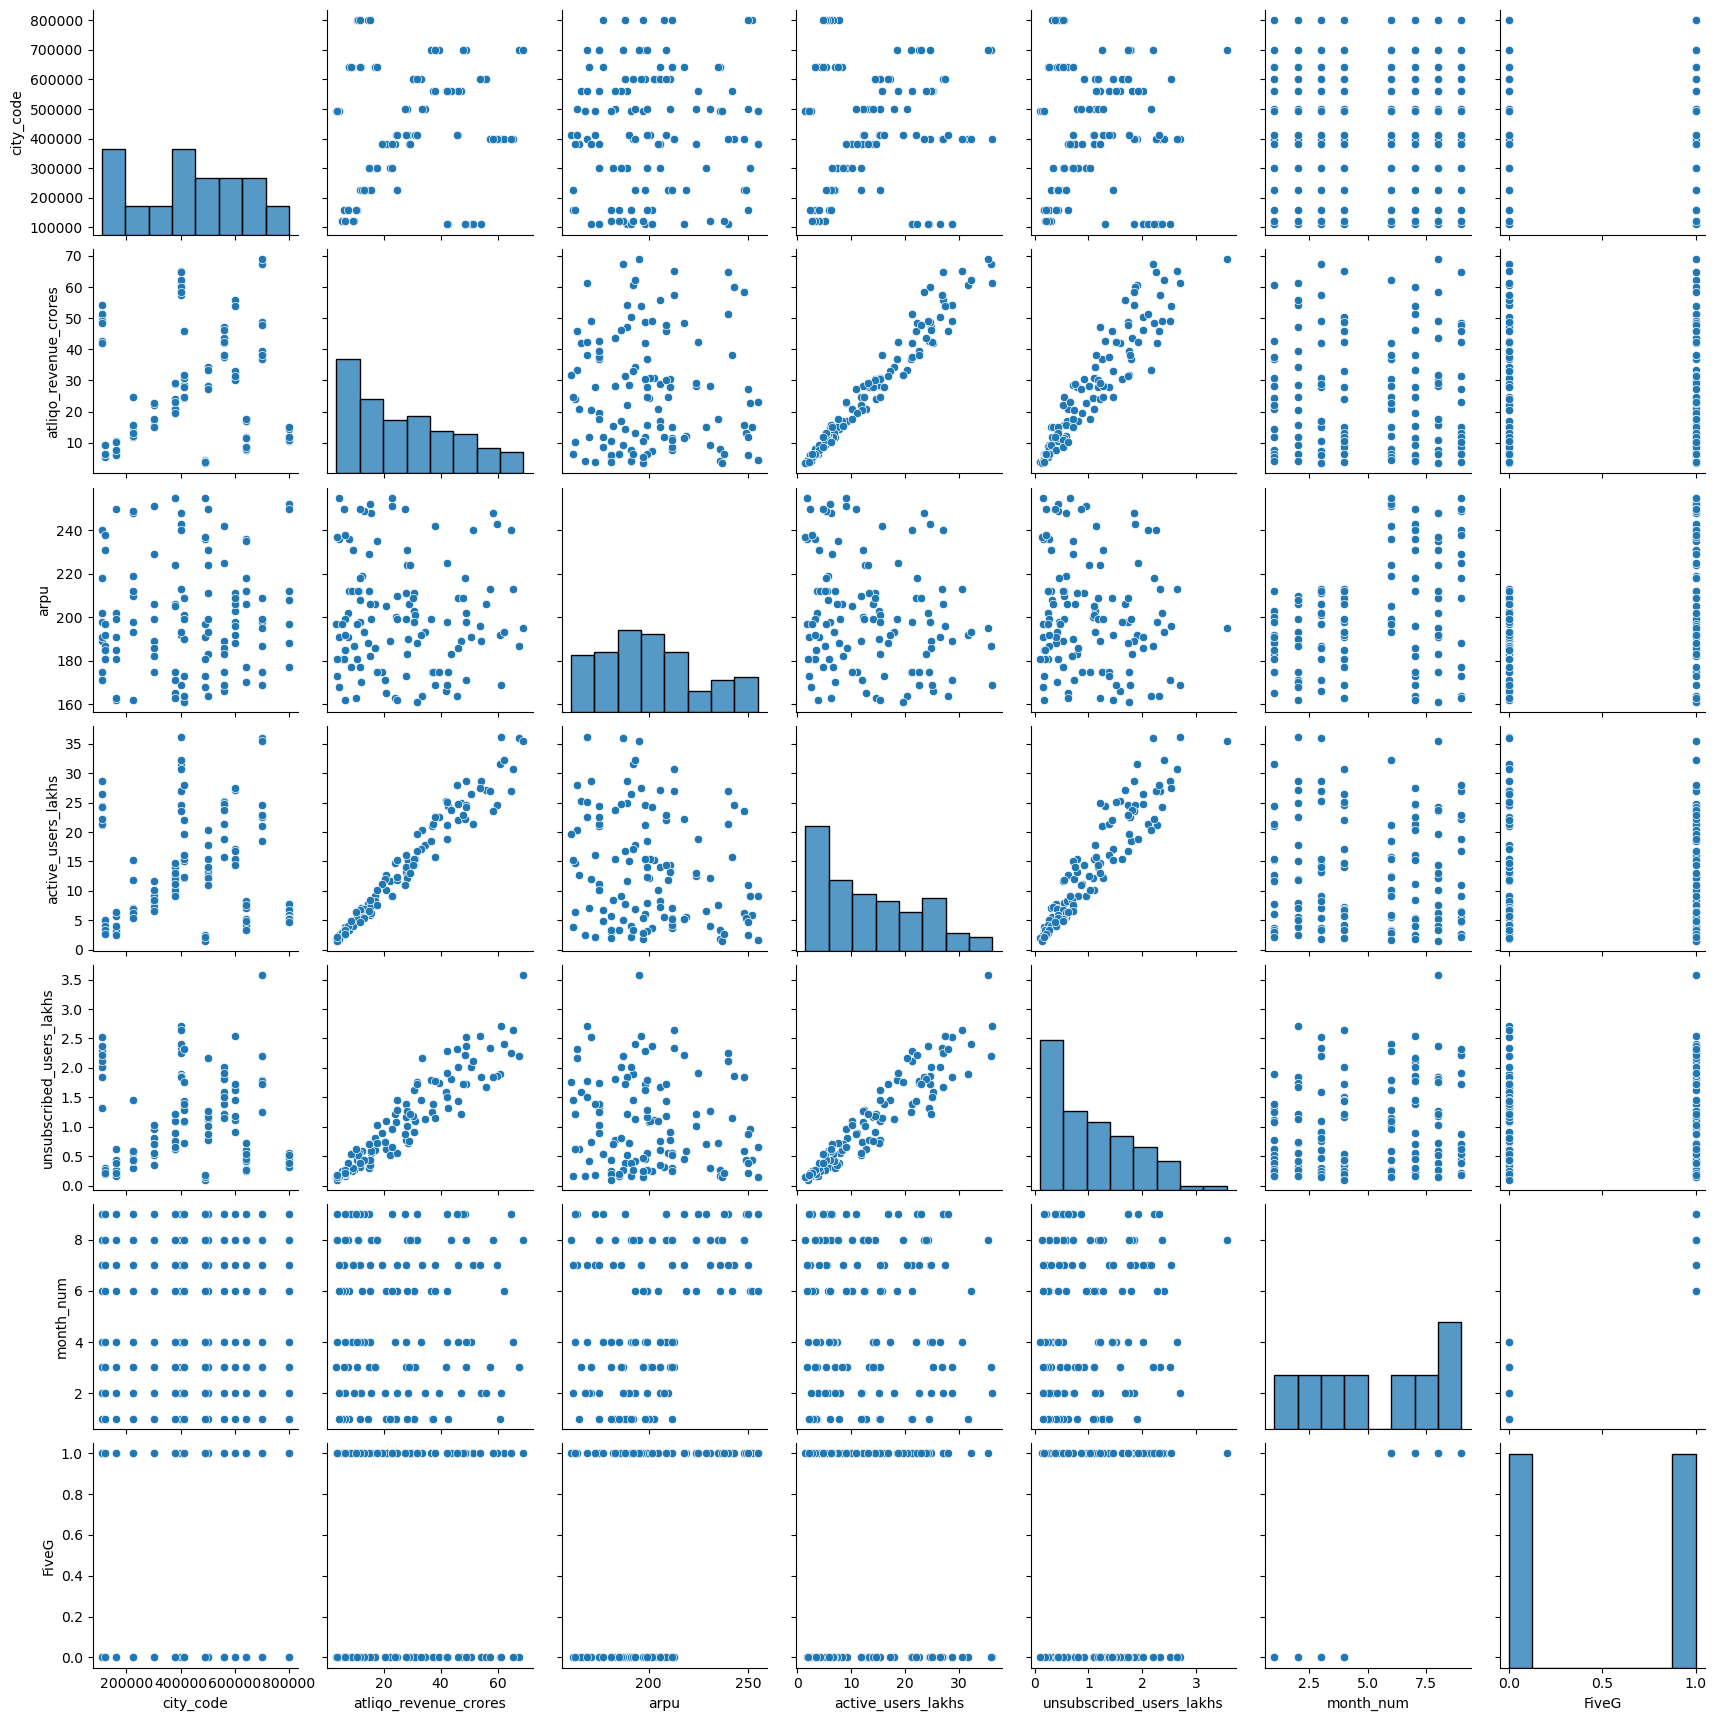

In [19]:
#checking the relation between numeric columns of metrics table
sns.pairplot(data=metrics)
plt.show()

In [20]:
#Converting dates from string to datetime format
metrics['date']= pd.to_datetime(metrics['date'])

In [21]:
metrics.dtypes

date                        datetime64[ns]
city_code                            int64
company                             object
atliqo_revenue_crores              float64
arpu                                 int64
active_users_lakhs                 float64
unsubscribed_users_lakhs           float64
month_num                            int64
FiveG                                int64
city_name                           object
dtype: object

## Visualizing the correlations between data

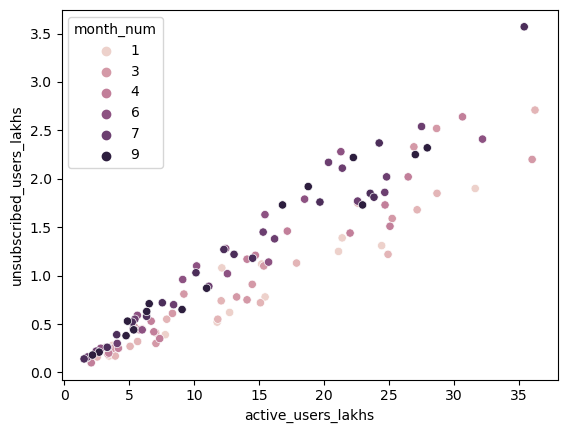

In [22]:
#visualization of metrics data using scatter plot to identify the relation between active and unssubcribed users based on months
sns.scatterplot(x='active_users_lakhs',y='unsubscribed_users_lakhs',hue='month_num',data=metrics)
plt.show()

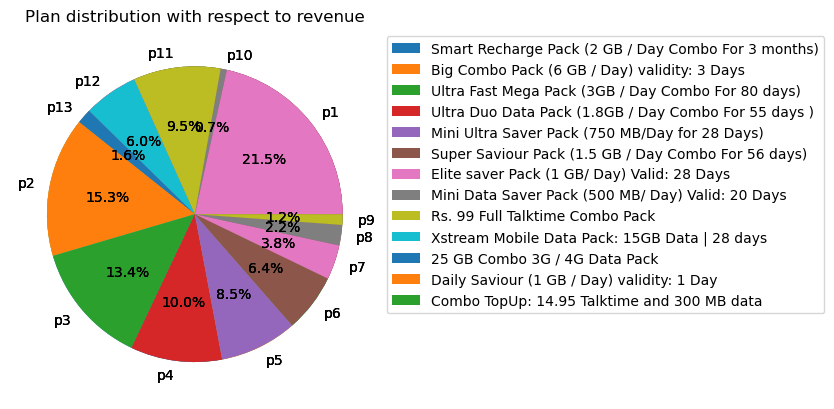

In [86]:
#Plan distribution with respect to revenue
plan_rev_tot = plan_revenue.query("plans != 'others'").groupby('plans')['plan_revenue_crores'].agg(['sum'])
plans_sorted = plan.sort_values(by = 'plan')
plt.pie(plan_rev_tot['sum'], labels = plan_rev_tot.index,autopct='%1.1f%%')
plt.title('Plan distribution with respect to revenue')
plt.legend(plans_sorted['plan_description'],bbox_to_anchor =(1, 1), ncol = 1)
plt.show()

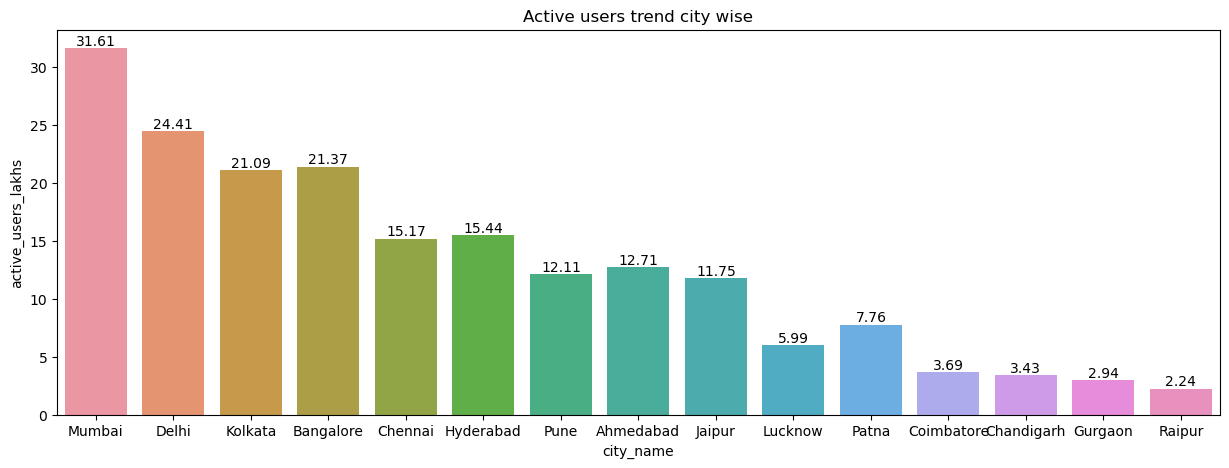

In [59]:
#city wise Active users trend city wise
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cities['city_name'],y='active_users_lakhs',data=metrics)
ax.set_title('Active users trend city wise')
for i in ax.containers:
    ax.bar_label(i,)
    plt.show()

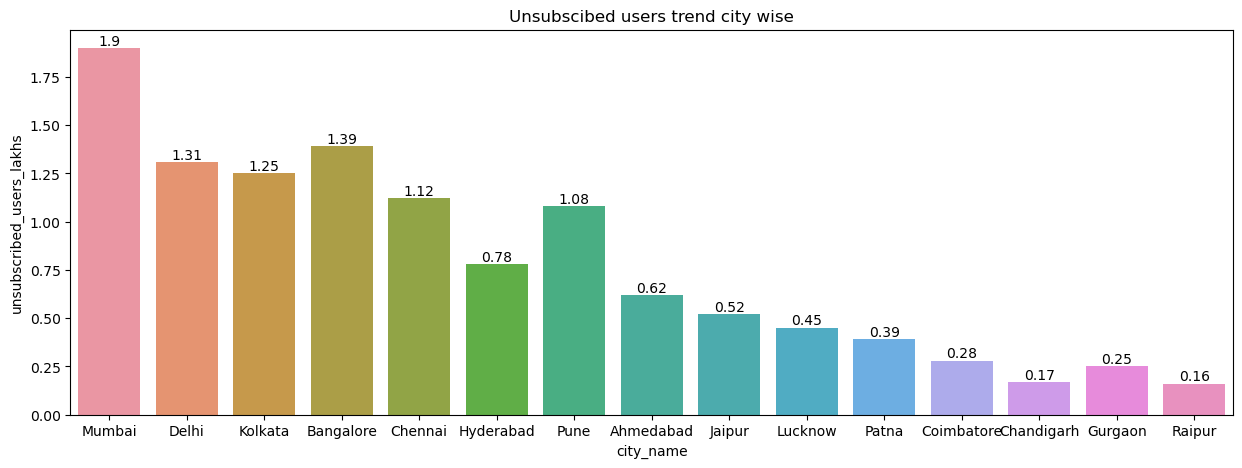

In [60]:
#city wise unsubscibed users trend city wise
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cities['city_name'],y='unsubscribed_users_lakhs',data=metrics)
ax.set_title('Unsubscibed users trend city wise')
for i in ax.containers:
    ax.bar_label(i,)
    plt.show()

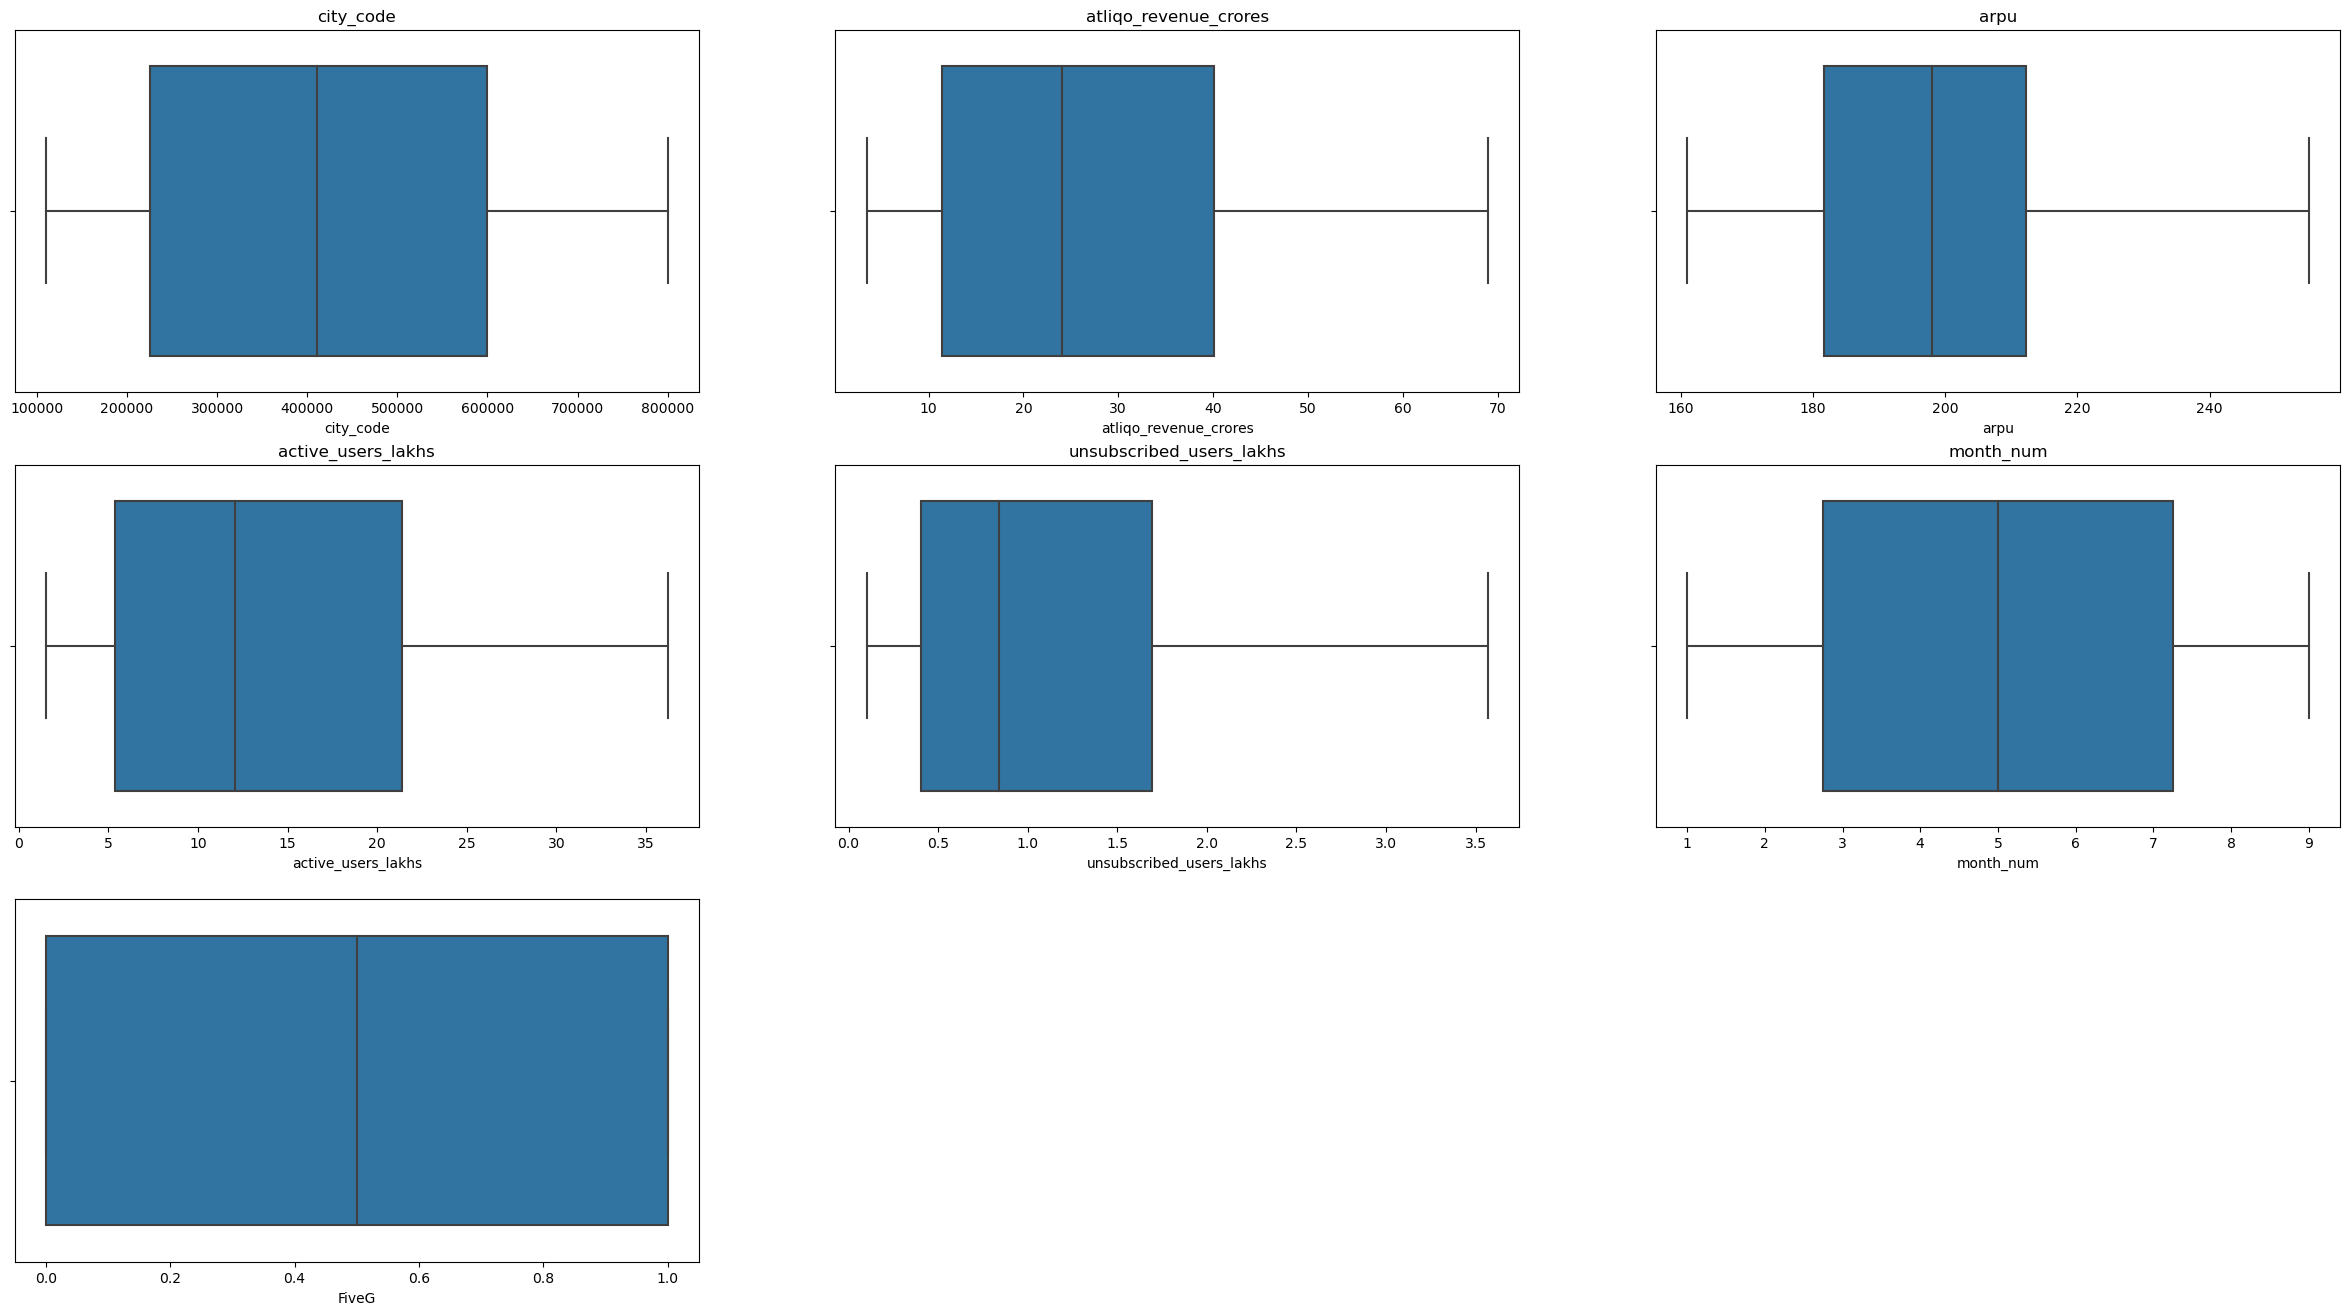

In [65]:
#Checking Outliers using boxplot
plt.figure(figsize = (30,16))
for i,j in enumerate(metrics.select_dtypes(include = "number").columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(metrics[j])
    plt.xlabel("{}".format(j))
    plt.title('{}'.format(j))

plt.show()

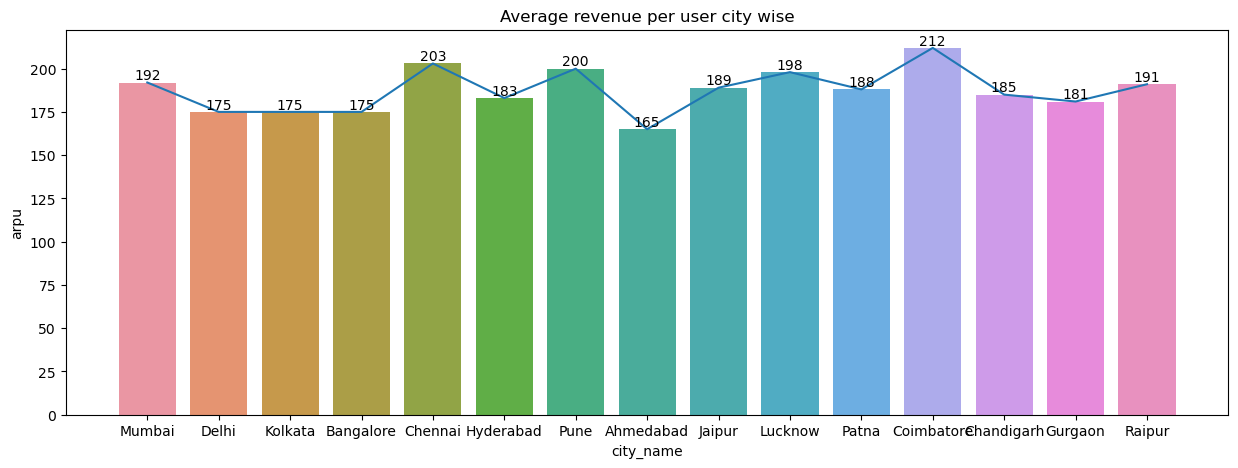

In [68]:
#Average revenue per user city wise
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cities['city_name'],y='arpu',data=metrics)
ax= sns.lineplot(x=cities['city_name'],y='arpu',data=metrics)
plt.title('Average revenue per user city wise')
for i in ax.containers:
    ax.bar_label(i,)
    plt.show()


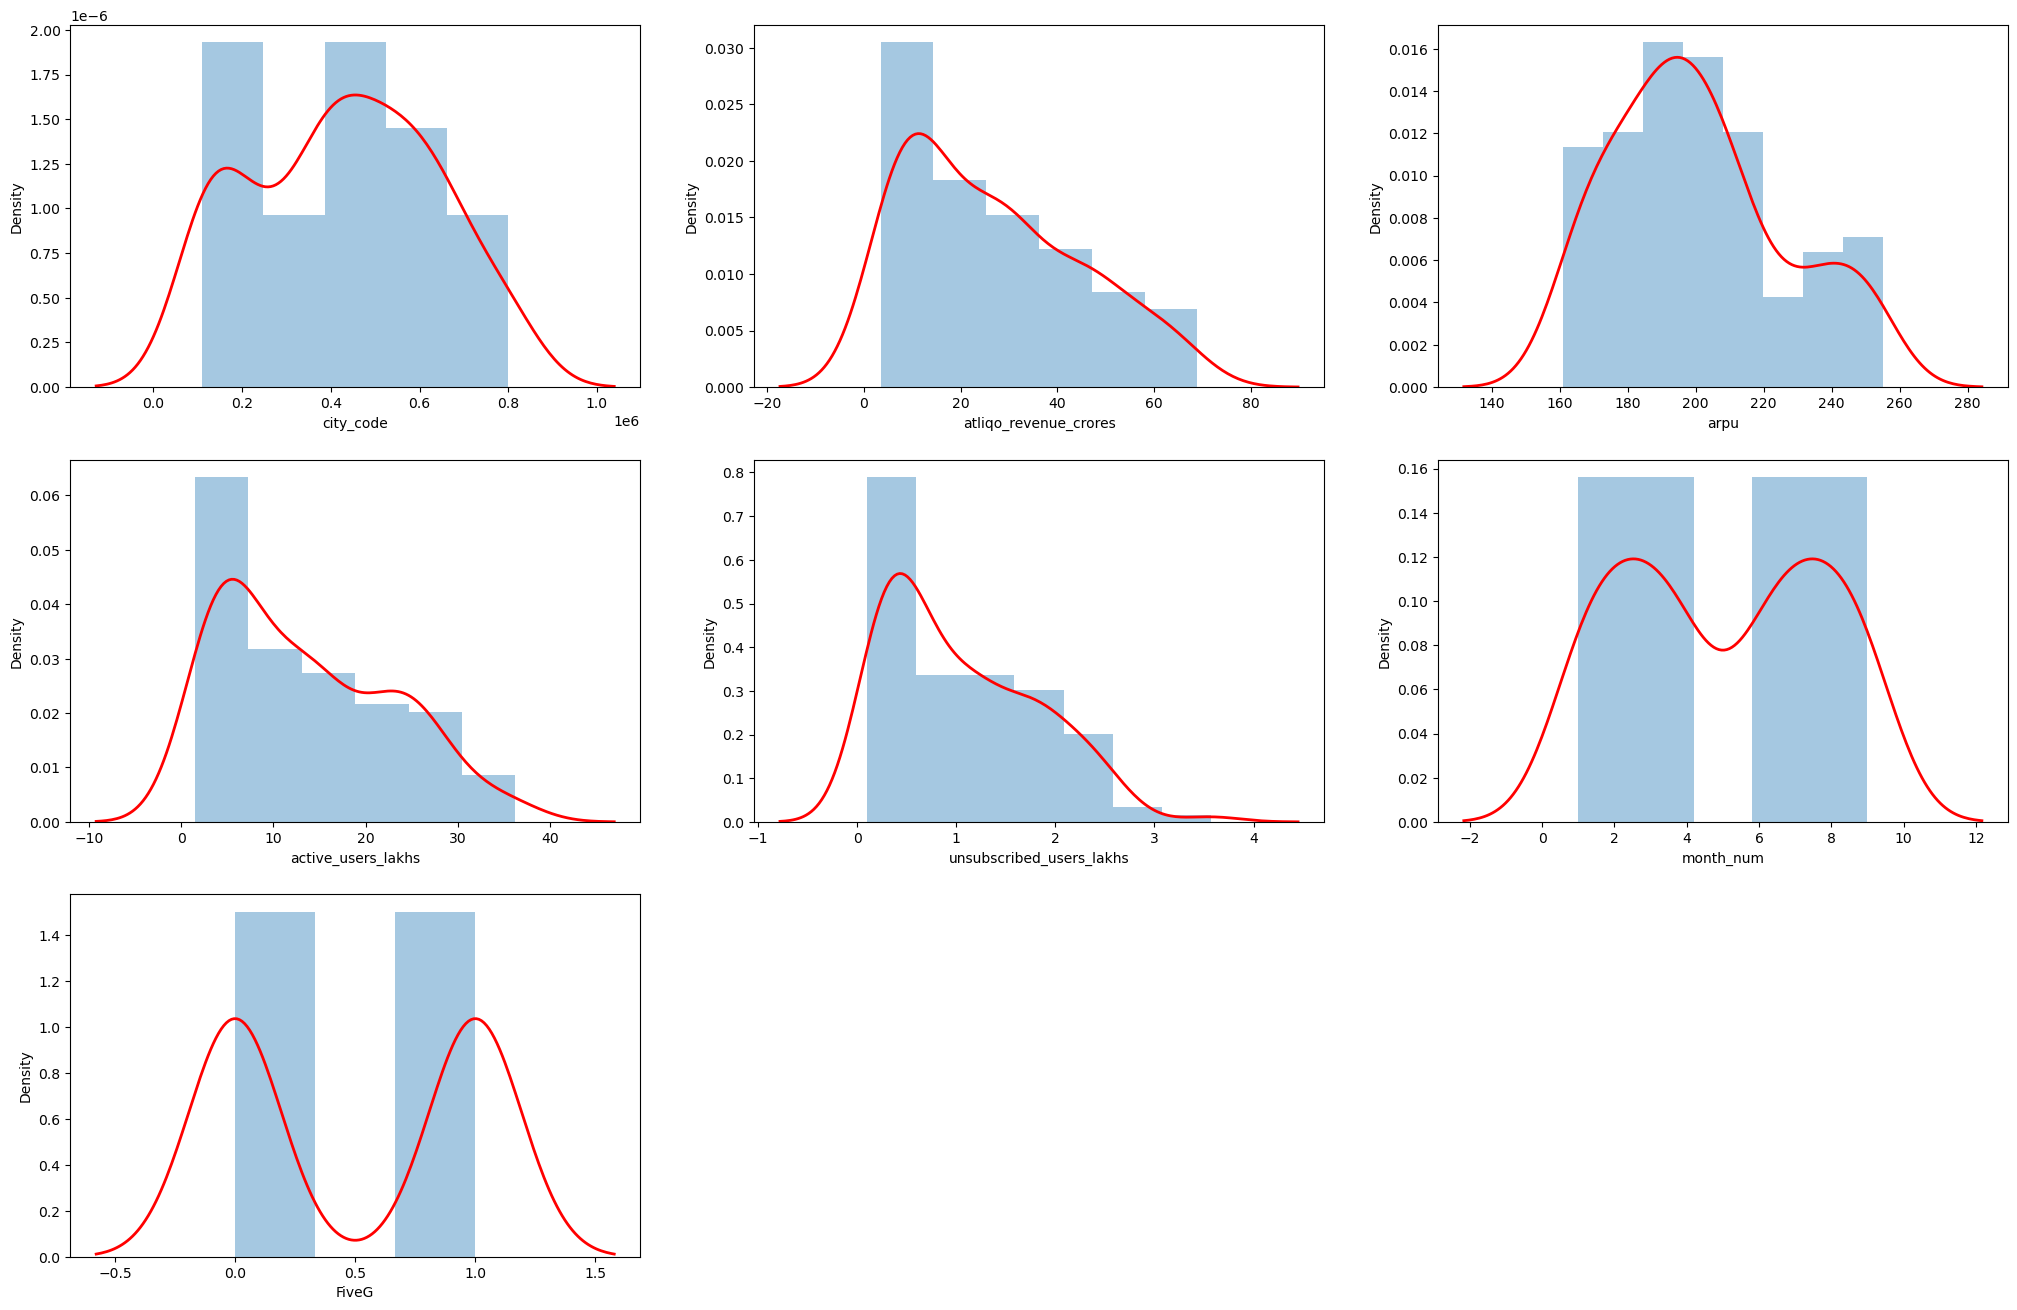

In [69]:
#Finding the distribution of numeric columns data in the dataframe metrics
plt.figure(figsize = (25,16))

for i,j in enumerate(metrics.select_dtypes(include = "number").columns):
    plt.subplot(3,3,i+1)
    sns.distplot(metrics[j], kde_kws = {"color":"red", "lw":2})
plt.show()

# Questions ?

1. What is the total revenue
2. What is the total revenue before 5G and after 5G?
3. Which city is contributing more profit?
4. Which city has more unsubcribed users? on which month ?
5. Which city has more active users? on which month ?
6. What is ARPU average ?
7. What is the average Market share % ?
8. Who are all the competitors ?
9. What plan is liked by most of the customers ?
10. Which new 5G plan attracts more new users ?


In [29]:
#What is the total revenue
print(f"The Total revenue of AltiQo in the year 2022 is {metrics['atliqo_revenue_crores'].sum()}")

The Total revenue of AltiQo in the year 2022 is 3187.36


In [30]:
#What is the total revenue before 5G and after 5G? What is the difference ? 

Before_5G_Revenue = round(metrics.query('FiveG==0').groupby('FiveG')['atliqo_revenue_crores'].agg(['sum']),2)
After_5G_Revenue = round(metrics.query('FiveG==1').groupby('FiveG')['atliqo_revenue_crores'].agg(['sum']),2)
Difference = round((Before_5G_Revenue['sum'][0] - After_5G_Revenue['sum'][1]),2)
print(f"Revenue before 5G is : {Before_5G_Revenue['sum'][0]} crores \n\
Revenue after 5G is: {After_5G_Revenue['sum'][1]} crores \n\
Difference between the revenues is : {Difference} crores")

Revenue before 5G is : 1597.7 crores 
Revenue after 5G is: 1589.66 crores 
Difference between the revenues is : 8.04 crores


In [31]:
#Which city is contributing more profit?
City_wise_profits =metrics.query("atliqo_revenue_crores != 'Other'")\
                          .groupby('city_name')['atliqo_revenue_crores']\
                          .agg(['sum'])
print(f"The city which is contributing more profit is\
{City_wise_profits[City_wise_profits['sum']==max(City_wise_profits['sum'])].index.item()}")

The city which is contributing more profit is Mumbai


In [32]:
#Which city has more unsubcribed users? on which month ?
Unsubscibed =metrics.query("unsubscribed_users_lakhs != 0")\
                          .groupby('city_name')['unsubscribed_users_lakhs']\
                          .agg(['sum'])
Month = metrics.query("unsubscribed_users_lakhs != 0")\
                          .groupby('month_num')['unsubscribed_users_lakhs']\
                          .agg(['sum'])
print(f"The city has more unsubcribed users is\
{Unsubscibed[Unsubscibed['sum']==max(Unsubscibed['sum'])].index.item()}\
 and it's on the {Month[Month['sum']==max(Month['sum'])].index.item()}th Month of the year ")

The city has more unsubcribed users is Mumbai and it's on the 8th Month of the year 


In [33]:
#Which city has more active users? on which month ? 
active =metrics.query("active_users_lakhs != 0")\
                          .groupby('city_name')['active_users_lakhs']\
                          .agg(['sum'])
Month = metrics.query("active_users_lakhs != 0")\
                          .groupby('month_num')['active_users_lakhs']\
                          .agg(['sum'])
print(f"The city has more active users is\
{active[active['sum']==max(active['sum'])].index.item()}\
 and it's on the {Month[Month['sum']==max(Month['sum'])].index.item()}nd Month of the year ")

The city has more active users is Mumbai and it's on the 2nd Month of the year 


In [34]:
#What is ARPU average ?
print(f"The average ARPU is {round(metrics['arpu'].mean(),2)}")

The average ARPU is 200.74


In [35]:
#What is the average Market share % 
print(f"The average market share % is {round(market_share['ms_pct'].mean(),0)}%")

The average market share % is 20.0%


In [36]:
#Who are all the competitors for AltiQo?
print(f"The market competitors are {', '.join(map(str, market_share['company'].unique()[1:]))}")

The market competitors are Britel, PIO, DADAFONE, Others


In [37]:
#What plan is liked by most of the customers ?
plan_liked = plan_revenue.query("plans != 'others'").groupby('plans')['plan_revenue_crores'].agg(['sum'])
max_liked = plan_liked[plan_liked['sum']==max(plan_liked['sum'])].index.item()
print(f"The plan preferred by most of the customers is {max_liked} : \
 {plan[plan['plan'] == max_liked]['plan_description'].item()}")

The plan preferred by most of the customers is p1 :  Smart Recharge Pack (2 GB / Day Combo For 3 months)


In [38]:
#Which new 5G plan attracts more new users ?
After_5G_new_plan_revenues = plan_revenue.query("FiveG == 1 and plans==('p11','p12','p13') ")\
                                         .groupby('plans')['plan_revenue_crores']\
                                         .agg(['sum'])
max_revenue_plan = After_5G_new_plan_revenues[After_5G_new_plan_revenues['sum']==max(After_5G_new_plan_revenues['sum'])]\
                    .index.item()
plan_details = plan[plan['plan']==max_revenue_plan].plan_description.item()
print(f"The new plan which attracts more users is {max_revenue_plan} : {plan_details}")

The new plan which attracts more users is p11 : Ultra Fast Mega Pack (3GB / Day Combo For 80 days)
